# Code generated from experiment 11 (ANN) and fMRI data

In [3]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from importlib import reload
import tools
import pandas as pd
plt.rcParams['font.sans-serif'] = "Arial"
import h5py
import nibabel as nib

In [7]:
datadir = '../../data/model_results/experiment10/'
datadir11 = '../../data/model_results/experiment11/'

# figuredir = '../figures/manuscriptFigures_v2/SFig_ReversedPretraining/'
figuredir = '../manuscripts/neurips2022/figures/SFig_PairwisePS_Analysis_ANNxFMRI/'


palette = sns.color_palette("Set2")


# Visualize PS matrices for each hidden layer

In [5]:
simstart = 0 
simend = 40

ps_logic_mat = np.zeros((4,4,3,40)) # rules x rules, layers, sims
ps_sensory_mat = np.zeros((4,4,3,40)) # rules x rules, layers, sims
ps_motor_mat = np.zeros((4,4,3,40)) # rules x rules, layers, sims
for i in range(simstart+1,simend):
    ####
    # 2 layers
    #
    h5f = h5py.File('../../data/model_results/experiment11/expt10_adam_zeroshot_3layers_pretraining_2rulepretraining_simData' + str(i) + 'psMatrices.h5','r')
    ps_logic_mat[:,:,:,i] = h5f['logic'][:].copy()
    ps_sensory_mat[:,:,:,i] = h5f['sensory'][:].copy()
    ps_motor_mat[:,:,:,i] = h5f['motor'][:].copy()
    logic_classes = pd.read_csv('../../data/model_results/experiment11/PS_ClassLabels_Logic.txt').values[:,1]
    sensory_classes = pd.read_csv('../../data/model_results/experiment11/PS_ClassLabels_Sensory.txt').values[:,1]
    motor_classes = pd.read_csv('../../data/model_results/experiment11/PS_ClassLabels_Motor.txt').values[:,1]
    h5f.close()

ps_logic_mat_avg = np.mean(ps_logic_mat,axis=3)
ps_sensory_mat_avg = np.mean(ps_sensory_mat,axis=3)
ps_motor_mat_avg = np.mean(ps_motor_mat,axis=3)



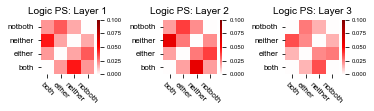

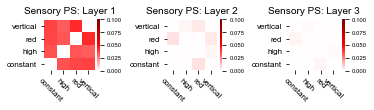

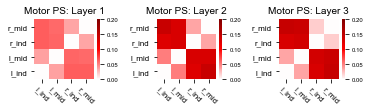

In [26]:
plt.figure(figsize=(5.25,2.5))
for layer in range(3):
    plt.subplot(int('13' + str(layer+1)))
    ax = sns.heatmap(ps_logic_mat_avg[:,:,layer], square=True, cmap='seismic',center=0,vmin=0,vmax=0.1,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=6)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),logic_classes,fontsize=8,rotation=-45)
    plt.yticks(np.arange(0.5, 4.5),logic_classes,fontsize=8,rotation=0)
    plt.title('Logic PS: Layer ' + str(layer+1),fontsize=10)
plt.tight_layout()
plt.savefig(figuredir + 'ANN_LogicPS.png',dpi=300)
    
plt.figure(figsize=(5.25,2.5))
for layer in range(3):
    plt.subplot(int('13' + str(layer+1)))
    ax = sns.heatmap(ps_sensory_mat_avg[:,:,layer], square=True, cmap='seismic',center=0,vmin=0,vmax=0.1,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=6)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),sensory_classes,fontsize=8,rotation=-45)
    plt.yticks(np.arange(0.5, 4.5),sensory_classes,fontsize=8,rotation=0)
    plt.title('Sensory PS: Layer ' + str(layer+1),fontsize=10)
plt.tight_layout()
plt.savefig(figuredir + 'ANN_SensoryPS.png',dpi=300)
    
plt.figure(figsize=(5.25,2.5))
for layer in range(3):
    plt.subplot(int('13' + str(layer+1)))
    ax = sns.heatmap(ps_motor_mat_avg[:,:,layer], square=True, cmap='seismic',center=0,vmin=0,vmax=0.2,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=6)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),motor_classes,fontsize=8,rotation=-45)
    plt.yticks(np.arange(0.5, 4.5),motor_classes,fontsize=8,rotation=0)
    plt.title('Motor PS: Layer ' + str(layer+1),fontsize=10)
plt.tight_layout()
plt.savefig(figuredir + 'ANN_MotorPS.png',dpi=300)
    

# Get correponding matrices for PS in fMRI data

In [12]:
# Load network
# Using final partition
networkdef = np.loadtxt('../../data/network_partition.txt')
networkorder = np.asarray(sorted(range(len(networkdef)), key=lambda k: networkdef[k]))
networkorder.shape = (len(networkorder),1)
# network mappings for final partition set
networkmappings = {'fpn':7, 'vis1':1, 'vis2':2, 'smn':3, 'aud':8, 'lan':6, 'dan':5, 'con':4, 'dmn':9, 
                   'pmulti':10, 'none1':11, 'none2':12}
networks = networkmappings.keys()

n_parcels = 360

#
h5f = h5py.File('../../data/results/PS_matrices_Logic.h5','r')
logicps_mat = h5f['data'][:].copy()
h5f.close()
logic_classes = pd.read_csv('../../data/results/PS_Logic_ClassLabels.txt').values[:,1]

h5f = h5py.File('../../data/results/PS_matrices_Sensory.h5','r')
sensoryps_mat = h5f['data'][:].copy()
h5f.close()
sensory_classes = pd.read_csv('../../data/results/PS_Sensory_ClassLabels.txt').values[:,1]

h5f = h5py.File('../../data/results/PS_matrices_Motor.h5','r')
motorps_mat = h5f['data'][:].copy()
h5f.close()
motor_classes = pd.read_csv('../../data/results/PS_Motor_ClassLabels.txt').values[:,1]


In [13]:
associationnets = ['con','dan','lan','fpn','dmn','pmulti','none1','none2']
sensorimotornets = ['vis1','vis2','smn','aud']
sensorynets = ['vis1','vis2','aud']
motornets = ['smn']

ruledomains = ['Sensory', 'Logic', 'Motor']

sensory_rois = []
for net in sensorynets:
    sensory_rois.extend(np.where(networkdef==networkmappings[net])[0])

association_rois = []
for net in associationnets:
    association_rois.extend(np.where(networkdef==networkmappings[net])[0])

motor_rois = []    
for net in motornets:
    motor_rois.extend(np.where(networkdef==networkmappings[net])[0])
    
sensory_rois = np.asarray(sensory_rois)
association_rois = np.asarray(association_rois)
motor_rois = np.asarray(motor_rois)


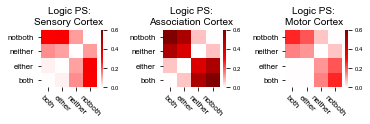

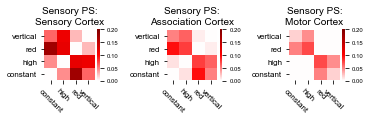

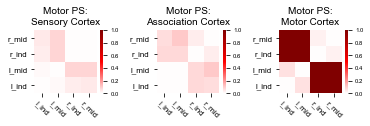

In [24]:
layers = [sensory_rois,association_rois,motor_rois]
layer_id = ['Sensory', 'Association', 'Motor']
motor_ind = np.asarray([0,1,2,3]) # same ordering as in ANN
motor_ind.shape = (len(motor_ind),1)
motor_classes = ['l_ind','l_mid','r_ind', 'r_mid']

sensory_ind = np.asarray([0,3,1,2]) # sensory classes are not the same label ordering as in ANN experiment
sensory_ind.shape = (len(sensory_ind),1)
sensory_classes = ['constant','high','red','vertical']

logic_ind = np.asarray([0,1,2,3])
logic_ind.shape = (len(logic_ind),1)
logic_classes = np.asarray(['both','either','neither','notboth'])

plt.figure(figsize=(5.25,2.5))
i = 1
for layer in layers:
    plt.subplot(int('13' + str(i)))
    ax = sns.heatmap(np.mean(logicps_mat[logic_ind,logic_ind.T][:,:,layer],axis=2), square=True, cmap='seismic',vmin=0,vmax=0.6,center=0,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=6)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),logic_classes,fontsize=8,rotation=-45)
    plt.yticks(np.arange(0.5, 4.5),logic_classes,fontsize=8,rotation=0)
    plt.title('Logic PS:\n' + layer_id[i-1] + ' Cortex',fontsize=10)
    i += 1
plt.tight_layout()
plt.savefig(figuredir + 'fMRI_LogicPS.png',dpi=300)


plt.figure(figsize=(5.25,2.5))
i = 1
for layer in layers:
    plt.subplot(int('13' + str(i)))
    ax = sns.heatmap(np.mean(sensoryps_mat[sensory_ind,sensory_ind.T][:,:,layer],axis=2), square=True, cmap='seismic',vmin=0,vmax=0.2,center=0,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=6)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),sensory_classes,fontsize=8,rotation=-45)
    plt.yticks(np.arange(0.5, 4.5),sensory_classes,fontsize=8,rotation=0)
    plt.title('Sensory PS:\n' + layer_id[i-1] + ' Cortex',fontsize=10)
    i += 1
plt.tight_layout()
plt.savefig(figuredir + 'fMRI_SensoryPS.png',dpi=300)

plt.figure(figsize=(5.25,2.5))
i = 1
for layer in layers:
    plt.subplot(int('13' + str(i)))
    ax = sns.heatmap(np.mean(motorps_mat[motor_ind, motor_ind.T][:,:,layer],axis=2), square=True, cmap='seismic',vmin=0,vmax=1.0,center=0,cbar=True,cbar_kws={'fraction':0.046})
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=6)    
    ax.invert_yaxis()
    plt.xticks(np.arange(.5,4.5),motor_classes,fontsize=8,rotation=-45)
    plt.yticks(np.arange(0.5, 4.5),motor_classes,fontsize=8,rotation=0)
    plt.title('Motor PS:\n' + layer_id[i-1] + ' Cortex',fontsize=10)
    i += 1
plt.tight_layout()
plt.savefig(figuredir + 'fMRI_MotorPS.png',dpi=300)

